In [1]:
import os
if os.getcwd() == '/content':
  from google.colab import drive
  drive.mount('/content/drive')
  %cd /content/drive/Othercomputers/Il\ mio\ MacBook\ Pro/universal/python

Mounted at /content/drive
/content/drive/Othercomputers/Il mio MacBook Pro/universal/python


In [2]:
!python demo_inception.py -i ../telefono.jpg

2023-10-20 14:55:44.083017: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-20 14:55:46.247369: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Instructions for updating:
Use tf.gfile.GFile.
>> Computing feedforward function...
>> Found a pre-computed universal perturbation! Retrieving it from ", file_perturbation
>> Testing the universal perturbation on an image
[[[241. 245. 246.]
  [240. 244. 245.]
  [240. 244. 245.]
  ...
  [208. 213. 216.]
  [209. 214. 217.]
  [208. 213. 216.]]

 [[244. 246. 247.]
  [243. 245. 246.]
  [244. 246. 247.]
  ...
  [208. 213. 216.]
  [209. 214. 217.]
  [209. 214. 217.]]

 [[245. 247. 247.]
  [245. 247. 247.]
  [246. 248. 248.]
  ...
  [208. 213. 216.]
  [210. 215. 218

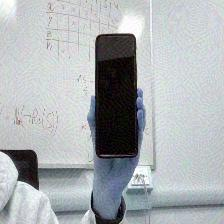

In [3]:
from PIL import Image
#Image.open('original.jpeg')
Image.open('perturbed.jpeg')

In [5]:
from google.colab.patches import cv2_imshow
import prepare_imagenet_data
img = Image.open('data/test_img.png')

In [7]:
imgs = prepare_imagenet_data.preprocess_image_batch(['../telefono.jpg'])
demeaned_img = imgs[0]
demeaned_img

[[[241. 245. 246.]
  [241. 245. 246.]
  [241. 245. 246.]
  ...
  [208. 213. 216.]
  [208. 213. 216.]
  [208. 213. 216.]]

 [[241. 245. 246.]
  [241. 245. 246.]
  [241. 245. 246.]
  ...
  [208. 213. 216.]
  [208. 213. 216.]
  [208. 213. 216.]]

 [[241. 245. 246.]
  [241. 245. 246.]
  [241. 245. 246.]
  ...
  [208. 213. 216.]
  [208. 213. 216.]
  [208. 213. 216.]]

 ...

 [[192. 201. 205.]
  [191. 200. 204.]
  [189. 198. 202.]
  ...
  [164. 171. 174.]
  [164. 171. 174.]
  [164. 171. 174.]]

 [[189. 198. 202.]
  [187. 196. 200.]
  [186. 195. 199.]
  ...
  [164. 171. 174.]
  [164. 171. 174.]
  [164. 171. 174.]]

 [[186. 195. 199.]
  [185. 194. 198.]
  [184. 193. 197.]
  ...
  [164. 171. 174.]
  [164. 171. 174.]
  [164. 171. 174.]]]


array([[[117.32   , 128.22101, 142.061  ],
        [117.32   , 128.22101, 142.061  ],
        [117.32   , 128.22101, 142.061  ],
        ...,
        [ 84.32   ,  96.221  , 112.061  ],
        [ 84.32   ,  96.221  , 112.061  ],
        [ 84.32   ,  96.221  , 112.061  ]],

       [[117.32   , 128.22101, 142.061  ],
        [117.32   , 128.22101, 142.061  ],
        [117.32   , 128.22101, 142.061  ],
        ...,
        [ 84.32   ,  96.221  , 112.061  ],
        [ 84.32   ,  96.221  , 112.061  ],
        [ 84.32   ,  96.221  , 112.061  ]],

       [[117.32   , 128.22101, 142.061  ],
        [117.32   , 128.22101, 142.061  ],
        [117.32   , 128.22101, 142.061  ],
        ...,
        [ 84.32   ,  96.221  , 112.061  ],
        [ 84.32   ,  96.221  , 112.061  ],
        [ 84.32   ,  96.221  , 112.061  ]],

       ...,

       [[ 68.32   ,  84.221  , 101.061  ],
        [ 67.32   ,  83.221  , 100.061  ],
        [ 65.32   ,  81.221  ,  98.061  ],
        ...,
        [ 40.32   ,  54.22

In [8]:
remeaned_img = prepare_imagenet_data.undo_image_avg(demeaned_img)
remeaned_img

array([[[241., 245., 246.],
        [241., 245., 246.],
        [241., 245., 246.],
        ...,
        [208., 213., 216.],
        [208., 213., 216.],
        [208., 213., 216.]],

       [[241., 245., 246.],
        [241., 245., 246.],
        [241., 245., 246.],
        ...,
        [208., 213., 216.],
        [208., 213., 216.],
        [208., 213., 216.]],

       [[241., 245., 246.],
        [241., 245., 246.],
        [241., 245., 246.],
        ...,
        [208., 213., 216.],
        [208., 213., 216.],
        [208., 213., 216.]],

       ...,

       [[192., 201., 205.],
        [191., 200., 204.],
        [189., 198., 202.],
        ...,
        [164., 171., 174.],
        [164., 171., 174.],
        [164., 171., 174.]],

       [[189., 198., 202.],
        [187., 196., 200.],
        [186., 195., 199.],
        ...,
        [164., 171., 174.],
        [164., 171., 174.],
        [164., 171., 174.]],

       [[186., 195., 199.],
        [185., 194., 198.],
        [184., 1

In [1]:
import tensorflow as tf

In [2]:
model = tf.keras.applications.inception_v3.InceptionV3(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

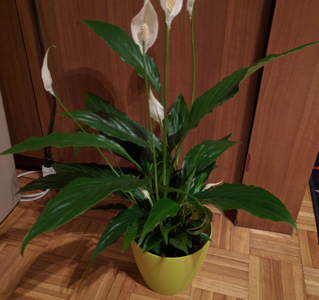

array([[[  8,  26,  51],
        [  6,  23,  51],
        [  6,  25,  53],
        ...,
        [ 36,  57, 107],
        [ 37,  58, 106],
        [ 38,  59, 108]],

       [[  9,  25,  51],
        [  7,  24,  51],
        [  7,  26,  53],
        ...,
        [ 35,  55, 105],
        [ 36,  56, 107],
        [ 36,  58, 108]],

       [[  8,  24,  50],
        [  6,  23,  50],
        [  6,  27,  53],
        ...,
        [ 37,  56, 107],
        [ 35,  57, 107],
        [ 30,  55, 105]],

       ...,

       [[ 34,  66, 109],
        [ 32,  63, 107],
        [ 28,  59, 105],
        ...,
        [ 59,  93, 142],
        [ 57,  91, 140],
        [ 63, 100, 146]],

       [[ 34,  68, 111],
        [ 37,  68, 111],
        [ 35,  67, 110],
        ...,
        [ 60,  97, 145],
        [ 57,  93, 142],
        [ 57,  92, 140]],

       [[ 36,  72, 115],
        [ 40,  73, 116],
        [ 39,  73, 115],
        ...,
        [ 52,  85, 138],
        [ 61, 101, 150],
        [ 69, 109, 154]]

In [6]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('data/test_img.png')
cv2_imshow(img)
img

In [7]:
from skimage.transform import resize

img_size = (299,299)
# crop_size = (224,224)

img = cv2.resize(img, img_size)

In [8]:
img

array([[[  8,  26,  51],
        [  6,  23,  51],
        [  6,  25,  53],
        ...,
        [ 36,  57, 107],
        [ 37,  58, 106],
        [ 38,  59, 108]],

       [[  9,  25,  51],
        [  7,  24,  51],
        [  7,  26,  53],
        ...,
        [ 35,  55, 105],
        [ 36,  56, 107],
        [ 36,  58, 108]],

       [[  8,  24,  50],
        [  6,  23,  50],
        [  6,  27,  53],
        ...,
        [ 37,  55, 106],
        [ 35,  57, 107],
        [ 30,  55, 105]],

       ...,

       [[ 34,  66, 109],
        [ 32,  63, 107],
        [ 28,  59, 105],
        ...,
        [ 58,  92, 141],
        [ 57,  91, 140],
        [ 63, 100, 146]],

       [[ 34,  68, 111],
        [ 37,  68, 111],
        [ 35,  67, 110],
        ...,
        [ 59,  96, 144],
        [ 57,  93, 142],
        [ 57,  92, 140]],

       [[ 36,  72, 115],
        [ 40,  73, 116],
        [ 38,  72, 114],
        ...,
        [ 52,  86, 138],
        [ 60,  99, 149],
        [ 69, 109, 154]]

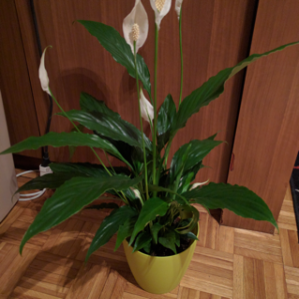

In [9]:
# img[:, :, 0] -= 123.68
# img[:, :, 1] -= 116.779
# img[:, :, 2] -= 103.939
# We permute the colors to get them in the BGR order
# if color_mode=="bgr":
#    img[:,:,[0,1,2]] = img[:,:,[2,1,0]]

#if crop_size:
  #img = img[(img_size[0] - crop_size[0]) // 2:(img_size[0] + crop_size[0]) // 2, (img_size[1]-crop_size[1])//2:(img_size[1]+crop_size[1])//2, :];

cv2_imshow(img)

In [10]:
import numpy as np
img = np.expand_dims(img, 0)
img.shape

(1, 299, 299, 3)

In [17]:
labels = open(os.path.join('data', 'labels.txt'), 'r').read().split('\n')

pred = model.predict(img)
label_pred = labels[np.argmax(pred)]

1/1 [==============================] - 1s 520ms/step


In [18]:
label_pred

'sliding door'